# OHP Air Transparency for a  molecular scattering and absorbing sky

He we vary the PWV absorption

- author Sylvie Dagoret-Campagne
- creation date April 2017


The purpose is to compare the air transparency for pure molecular absorbing sky,

- precipitable $O_3$ is default from LibRadTran 
- $H_2O$ vary from 0MM to 15mm  

In [17]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import pandas as pd
import os
import re

In [19]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Defines where the LibRadTran files are

In [20]:
currentpath=os.getcwd()
rootpath_us='../simulations/RT/2.0.1/OH/pp/us/sa/rt/wv/out/'
rootpath_mw='../simulations/RT/2.0.1/OH/pp/mw/sa/rt/wv/out/'
rootpath_sw='../simulations/RT/2.0.1/OH/pp/sw/sa/rt/wv/out/'

### Build the list of the files

In [21]:
filelist_us=os.listdir(rootpath_us) 
filelist_mw=os.listdir(rootpath_mw) 
#filelist_sw=os.listdir(rootpath_sw) 

### Make a sublist of the files for sky afglmw

In [22]:
filelist_afglmw= []
for filename in filelist_mw:
    if re.search('z10',filename):  #example of filename filter
        filelist_afglmw.append(filename)

### Make a sublist of the files for sky afglus

In [23]:
filelist_afglus= []
for filename in filelist_us:
    if re.search('z10',filename): #example of filename filter
        filelist_afglus.append(filename)

###  Show the air transparences for sky afglmw

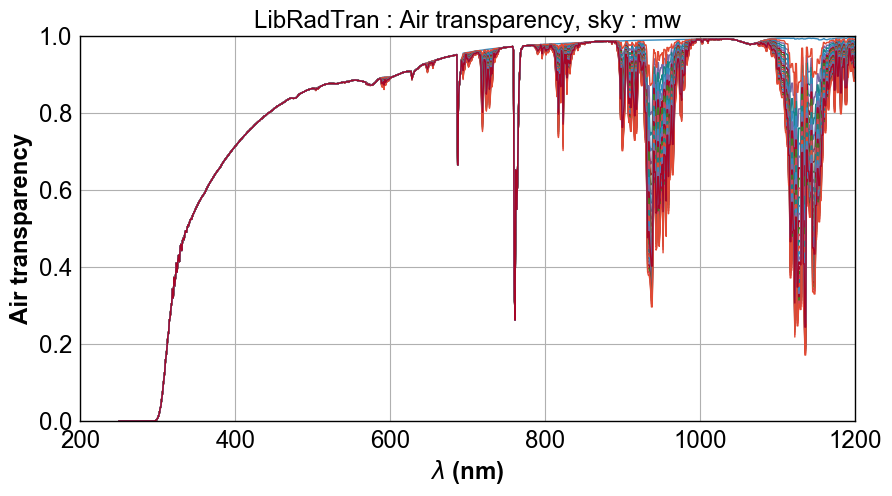

In [28]:
for filename in filelist_afglmw:
    fullpath=os.path.join(rootpath_mw,filename)
    data = np.loadtxt(fullpath)
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y)
    
plt.xlim(200,1200)
plt.ylim(0.,1)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Air transparency')   
plt.title('LibRadTran : Air transparency, sky : mw')

### Show the air transparences for sky afglus

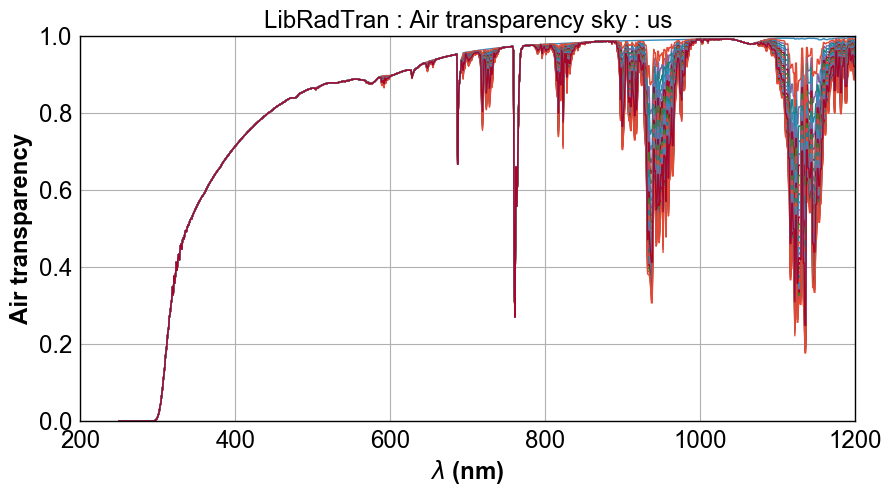

In [27]:
for filename in filelist_afglus:
    fullpath=os.path.join(rootpath_us,filename)
    data = np.loadtxt(fullpath)
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y)
    
plt.xlim(200,1200)
plt.ylim(0.,1)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Air transparency')   
plt.title('LibRadTran : Air transparency sky : us')

## Conclusion

The transparencies are the same concerning the molecular scattering

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide


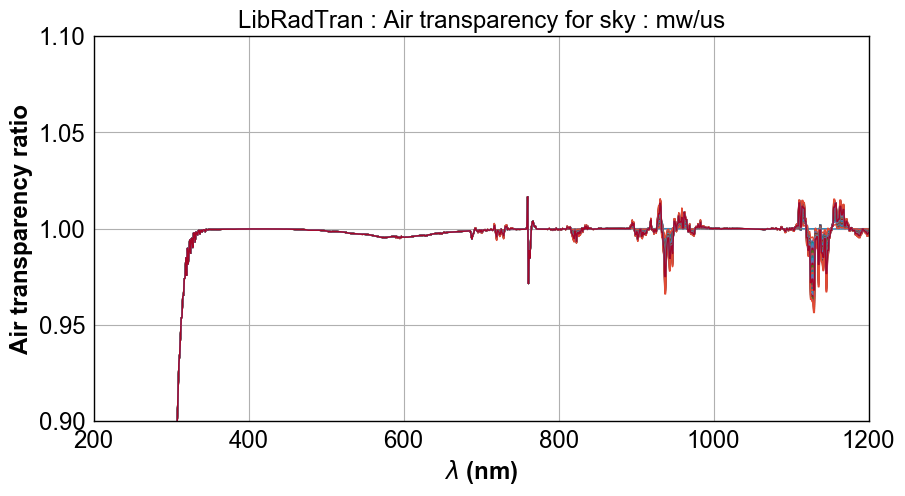

In [26]:
for index,filename1 in np.ndenumerate(filelist_afglus):
    idx=index[0]
    filename2=filelist_afglmw[idx]
    fullpath1=os.path.join(rootpath_us,filename1)
    fullpath2=os.path.join(rootpath_mw,filename2)
    data1 = np.loadtxt(fullpath1)
    x1=data1[:,0]
    y1=data1[:,1]
    data2 = np.loadtxt(fullpath2)
    x2=data2[:,0]
    y2=data2[:,1]
    ratio=y2/y1
    plt.plot(x1,ratio)
    
plt.xlim(200,1200)
plt.ylim(0.9,1.1)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Air transparency ratio')   
plt.title('LibRadTran : Air transparency for sky : mw/us')    